# 🧠 LLaMA 3 Medical Report Summarization - Evaluation Notebook

In [1]:
# ✅ Install required libraries (if not already installed)
!pip install PyPDF2 rouge-score sacrebleu bert-score ollama pandas

  Using cached rouge_score-0.1.2-py3-none-any.whl
     ---------------------------------------- 0.0/104.1 kB ? eta -:--:--
     -------------------------------------- 104.1/104.1 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/61.1 kB ? eta -:--:--
     ---------------------------------------- 61.1/61.1 kB ? eta 0:00:00
     ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
     ---- ----------------------------------- 1.2/11.6 MB 25.7 MB/s eta 0:00:01
     --------- ------------------------------ 2.9/11.6 MB 30.3 MB/s eta 0:00:01
     --------------- ------------------------ 4.6/11.6 MB 32.6 MB/s eta 0:00:01
     --------------------- ------------------ 6.3/11.6 MB 36.8 MB/s eta 0:00:01
     --------------------------- ------------ 8.0/11.6 MB 36.3 MB/s eta 0:00:01
     --------------------------------- ------ 9.8/11.6 MB 36.9 MB/s eta 0:00:01
     --------------------------------------  11.6/11.6 MB 38.5 MB/s eta 0:00:01
     ---------------


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# 📚 Import libraries
import os
import PyPDF2
import pandas as pd
from rouge_score import rouge_scorer
from sacrebleu import corpus_bleu
import bert_score
import ollama

import os
from pathlib import Path


c:\Users\KARAN\Desktop\College\projects\Medi_bot_git_project\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# 📄 Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ''
        for page in reader.pages:
            text += page.extract_text()
    return text

In [4]:
# 🤖 Function to get LLaMA summary
def get_llama_summary(text):
    response = ollama.chat(model='llama3', messages=[
        {"role": "user", "content": f"Summarize this medical report:\n{text}"}
    ])
    return response['message']['content']

In [5]:
# 📊 Evaluation metrics
def evaluate_metrics(references, hypotheses):
    scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
    rouge_scores = [scorer.score(ref, hyp)['rougeL'].fmeasure for ref, hyp in zip(references, hypotheses)]
    avg_rougeL = sum(rouge_scores) / len(rouge_scores)

    bleu = corpus_bleu(hypotheses, [references])

    P, R, F1 = bert_score.score(hypotheses, references, lang='en', verbose=False)
    return {
        "ROUGE-L": avg_rougeL,
        "BLEU": bleu.score,
        "BERTScore_F1": F1.mean().item(),
        "BERTScore_Precision": P.mean().item(),
        "BERTScore_Recall": R.mean().item()
    }

In [ ]:
# 📁 Manual setup: List of PDF files and corresponding gold summaries
pdf_path = r"C:\Users\KARAN\Desktop\College\projects\Medi_bot_git_project\backend\uploads\Sample-filled-in-MR.pdf"
reference_summary = """This is a medical report on the mental capacity of an individual, written by Dr. Tan Ah Moi on July 20, 2015. The report assesses the patient's ability to make decisions regarding their personal welfare and property/financial affairs.

Findings:

The patient lacks mental capacity to make decisions about their personal welfare (e.g., deciding where to live, consenting to medical treatment).
The patient also lacks mental capacity to manage their property and financial affairs (e.g., managing finances, making investment decisions).
Basis for opinion:

The doctor's opinion is based on the patient's clinical history and examination, which suggests that they have an impairment or disturbance in the functioning of their mind or brain.

Implications:

The patient would not be able to understand if informed about this application (i.e., a court order regarding their personal welfare or financial affairs).
Any decision made on behalf of the patient must be done in their best interests, considering alternatives that are less restrictive of their rights and freedom of action.
Legal framework:

The report references the Mental Capacity Act, which outlines the principles for determining mental capacity, including:

The assumption of capacity unless it is established that the person lacks capacity.
The need to take all practicable steps to help the person make a decision before concluding they lack capacity.
The requirement to act in the best interests of the person who lacks capacity.
Overall, the report concludes that the patient lacks mental capacity and requires a court order to manage their personal welfare and financial affairs."""  # (Use full summary as above)




text = extract_text_from_pdf(pdf_path)

# 🤖 Get the LLaMA summary
llama_summary = get_llama_summary(text)

# ✅ Evaluate the generated summary
metrics = evaluate_metrics([reference_summary], [llama_summary])

# 📊 Show Results
print("\n📈 Evaluation Results:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



📈 Evaluation Results:
ROUGE-L: 0.3848
BLEU: 22.6106
BERTScore_F1: 0.8913
BERTScore_Precision: 0.8939
BERTScore_Recall: 0.8887


In [21]:
!pip install seaborn


C:\Users\KARAN\AppData\Local\Temp\ipykernel_13584\2988326511.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_names, y=metrics_values, palette='viridis')


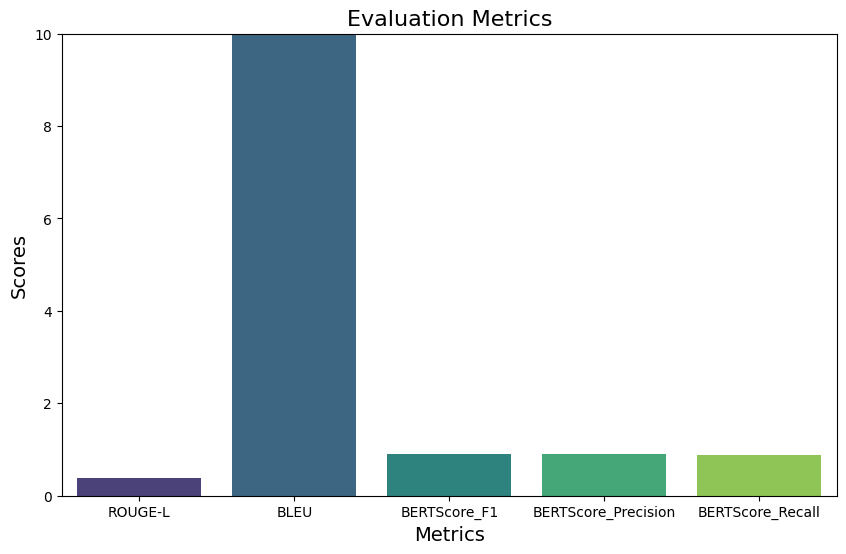

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the evaluation metrics
metrics_names = list(metrics.keys())
metrics_values = list(metrics.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_names, y=metrics_values, palette='viridis')

plt.title("Evaluation Metrics", fontsize=16)
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Scores", fontsize=14)
plt.ylim(0, 10)  # Set y-axis limit to [0, 1] to represent metric scores properly

# Display the plot
plt.show()